In [8]:
### Установим красивые дефолтные настройки
### Может быть лень постоянно прописывать
### У графиков параметры цвета, размера, шрифта
### Можно положить их в словарь дефолтных настроек

import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 5
mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'


## Переобучение и недообучение

Пусть имеем 2 модели: полиномиальную и обыкновенную немодифицированную линейную без свободного коэффициента

$$
a_1(x) = \beta_1\cdot d + \beta_2 \cdot d^2 + ... + \beta_{25}\cdot d^{25} + \beta_0
$$

$$
a_2(x) = \beta_1\cdot d
$$

Давайте сгенерируем выборку $(X, Y)$ следующим образом. Скажем, что **X** - какие-то случайные числа, равномерно лежащие в отрезке $[0, 20]$. Ответы (вектор таргетов $Y$) - удвоенные **X**-ы, сгенерированные с некоторым шумом, распределенным тоже равномерно на отрезке $[-6, 6]$. 

Разделим выборку на тренировочную и тестовую (например, в пропорциях 4:1) и проверим, в каком случае модель ошибается сильнее: при сложном моделировании или простом?

In [1]:
import numpy as np 

X = np.array(sorted([20*x for x in np.random.rand(120,1)]))

Y = np.array([2 * el + np.random.choice([-1, 1]) * 6 * np.random.rand() for el in X])

### Разобьем нашу выборку на train и test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

### Сохраним упорядоченные индексы наших элементов
### Это понадобится для визуализации!
index_argsort = np.argsort(X_train.reshape(72,))

### Построим простую линейную модель
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X_train, Y_train)

### Теперь построим полиномиальную модель

X_pol = X_train.copy()

for k in range(2, 26):
    X_pol = np.append(X_pol, 
                      np.array([x**k for x in X_pol[:, 0]]).reshape(72, -1),
                      axis=1)

ModuleNotFoundError: No module named 'numpy'

In [3]:
### Создадим новую модель model_pol

model_pol = LinearRegression(normalize=True)
model_pol.fit(X_pol, Y_train)

/Users/ruatbn5/PycharmProjects/localvenv/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

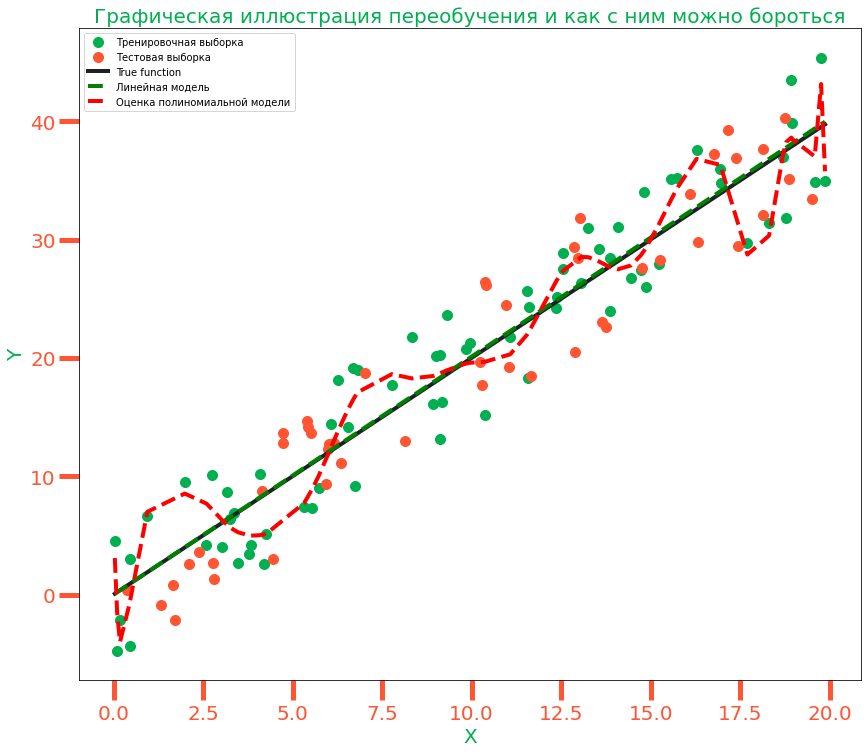

In [4]:
### Изобразим!
import matplotlib.pyplot as plt


fig = plt.figure()
fig.set_size_inches(14, 12)


plt.scatter(X_train, Y_train, c='#00B050', s=100)
plt.scatter(X_test, Y_test, c='#FF5533', s=100)
plt.plot(X, [2*x for x in X], '#1E2027', linewidth=4)
plt.plot(X_train[index_argsort], 
         model.predict(X_train[index_argsort]),
         '--g', linewidth=4)
plt.plot(X_train[index_argsort], 
         model_pol.predict(X_pol[index_argsort]),
         '--r', linewidth=4)


plt.legend(['Тренировочная выборка', 'Тестовая выборка', 'True function',
            'Линейная модель', 'Оценка полиномиальной модели'], 
            loc = 'upper left')
plt.xlabel('X')
plt.ylabel('Y')

plt.title('Графическая иллюстрация переобучения и как с ним можно бороться')

plt.show()

In [5]:
### Замерим качество линейной простой модели на трейн и тест сплитах

linear_train_loss = np.mean((model.predict(X_train)-Y_train)**2)
linear_test_loss = np.mean((model.predict(X_test)-Y_test)**2)

### Подготовим тестовые данные для полиномиальной модели
X_pol_test = X_test.copy()

for k in range(2, 26):
    X_pol_test = np.append(X_pol_test, 
                           np.array([x**k for x in X_pol_test[:, 0]]).reshape(48, -1),
                           axis=1)

### Замерим качество полиномиальной простой модели на трейн и тест сплитах  

polinomial_train_loss = np.mean((model_pol.predict(X_pol)-Y_train)**2)
polinomial_test_loss = np.mean((model_pol.predict(X_pol_test)-Y_test)**2)

print(f'Ошибка простой модели на тренировочной выборке: {round(linear_train_loss, 2)}')
print(f'Ошибка простой модели на тестовой выборке: {round(linear_test_loss, 2)} \n')

print(f'Ошибка полиномиальной модели на тренировочной выборке: {round(polinomial_train_loss, 2)}')
print(f'Ошибка полиномиальной модели на тестовой выборке: {round(polinomial_test_loss, 2)}')

Ошибка простой модели на тренировочной выборке: 13.28
Ошибка простой модели на тестовой выборке: 12.74 

Ошибка полиномиальной модели на тренировочной выборке: 7.58
Ошибка полиномиальной модели на тестовой выборке: 23.61


In [6]:
### Что еще может сигнализировать нам о переобучении, кроме сравнения качества?

In [13]:
[int(x) for x in model.coef_[0]]

[2]

In [15]:
model_pol.intercept_

array([6.91369894])

In [14]:
[int(x) for x in model_pol.coef_[0]]

[-125,
 481,
 -788,
 729,
 -418,
 152,
 -33,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

## Мысль1: получается, можно попробовать контролировать "размер" весов модели, чтобы она не переобучалась!

## Так же вспомним интересное наблюдение: модель с бОльшим количеством признаков может обучиться хуже даже на тренировочной выборке!

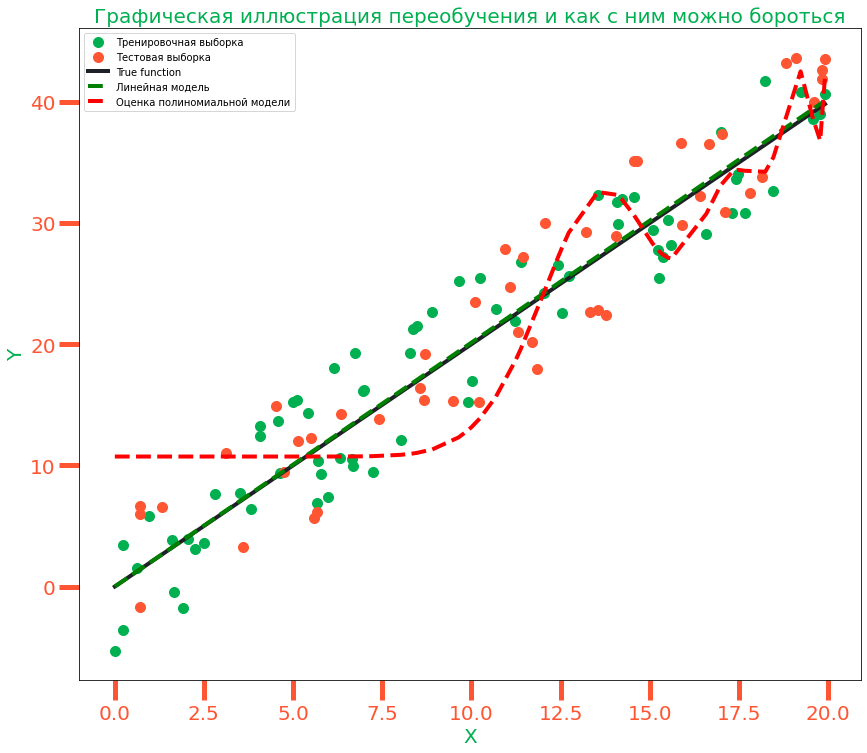

In [8]:
### Теперь построим полиномиальную модель

X_pol = X_train.copy()

for k in range(2, 26):
    X_pol = np.append(X_pol, 
                      np.array([x**k for x in X_pol[:, 0]]).reshape(72, -1),
                      axis=1)
    
### Создадим новую модель model_pol

model_pol = LinearRegression()
model_pol.fit(X_pol, Y_train)

### Изобразим!
import matplotlib.pyplot as plt


fig = plt.figure()
fig.set_size_inches(14, 12)


plt.scatter(X_train, Y_train, c='#00B050', s=100)
plt.scatter(X_test, Y_test, c='#FF5533', s=100)
plt.plot(X, [2*x for x in X], '#1E2027', linewidth=4)
plt.plot(X_train[index_argsort], 
         model.predict(X_train[index_argsort]),
         '--g', linewidth=4)
plt.plot(X_train[index_argsort], 
         model_pol.predict(X_pol[index_argsort]),
         '--r', linewidth=4)


plt.legend(['Тренировочная выборка', 'Тестовая выборка', 'True function',
            'Линейная модель', 'Оценка полиномиальной модели'], 
            loc = 'upper left')
plt.xlabel('X')
plt.ylabel('Y')

plt.title('Графическая иллюстрация переобучения и как с ним можно бороться')

plt.show()

In [9]:
### Замерим качество линейной простой модели на трейн и тест сплитах

linear_train_loss = np.mean((model.predict(X_train)-Y_train)**2)
linear_test_loss = np.mean((model.predict(X_test)-Y_test)**2)

### Подготовим тестовые данные для полиномиальной модели
X_pol_test = X_test.copy()
/
for k in range(2, 26):
    X_pol_test = np.append(X_pol_test, 
                           np.array([x**k for x in X_pol_test[:, 0]]).reshape(48, -1),
                           axis=1)

### Замерим качество полиномиальной простой модели на трейн и тест сплитах  

polinomial_train_loss = np.mean((model_pol.predict(X_pol)-Y_train)**2)
polinomial_test_loss = np.mean((model_pol.predict(X_pol_test)-Y_test)**2)

print(f'Ошибка простой модели на тренировочной выборке: {round(linear_train_loss, 2)}')
print(f'Ошибка простой модели на тестовой выборке: {round(linear_test_loss, 2)} \n')

print(f'Ошибка полиномиальной модели на тренировочной выборке: {round(polinomial_train_loss, 2)}')
print(f'Ошибка полиномиальной модели на тестовой выборке: {round(polinomial_test_loss, 2)}')

Ошибка простой модели на тренировочной выборке: 12.1
Ошибка простой модели на тестовой выборке: 14.69 

Ошибка полиномиальной модели на тренировочной выборке: 34.37
Ошибка полиномиальной модели на тестовой выборке: 29.65


## Такого быть не должно! Ведь полиномиальная модель по силе на тренировочной выборке уж точно не должна уступать обычной линейной:


$$
a_1(x) = \beta_1\cdot d + \beta_2 \cdot d^2 + ... + \beta_{25}\cdot d^{25} + \beta_0
$$

$$
a_2(x) = \beta_1\cdot d
$$


Пусть оптимальный коэффициент в обычной линейной модели равен 2, то есть

$$
a_2^*(x) = 2 \cdot d
$$

Такая модель приводит к определенному качеству $Q^*$ на тренировочной выборке.

Тогда на той же самой тренировочной выборке первая модель может выдать КАК МИНИМУМ такое же $Q^*$, если во все коэффициенты, кроме $\beta_1^*$ положить нолики!

$$
a_1^*(x) = 2 \cdot d + 0\cdot d^2 + ... + 0\cdot d^{25} + 0 = 2\cdot d
$$

А вообще, говоря, качество у первой модели, скорее всего, должно быть даже выше! Но никак не меньше. 

## Мысль2: вероятно, существует какая-то проблема, которая не позволяет изученным методам правильно раскрыться в LinearRegression.fit()

## Регуляризация полиномиальной модели

In [10]:
X_pol

array([[8.35287355e+00, 6.97704966e+01, 5.82784136e+02, ...,
        1.59303699e+21, 1.33064366e+22, 1.11146982e+23],
       [8.26815022e+00, 6.83623080e+01, 5.65229832e+02, ...,
        1.26006295e+21, 1.04183898e+22, 8.61408116e+22],
       [1.27278765e+01, 1.61998839e+02, 2.06190121e+03, ...,
        2.56676957e+25, 3.26695260e+26, 4.15813692e+27],
       ...,
       [1.74833513e+01, 3.05667573e+02, 5.34409355e+03, ...,
        3.80511452e+28, 6.65261539e+29, 1.16310012e+31],
       [6.66521404e+00, 4.44250782e+01, 2.96102655e+02, ...,
        8.86593029e+18, 5.90933230e+19, 3.93869646e+20],
       [1.42082252e+01, 2.01873663e+02, 2.86826645e+03, ...,
        3.22415652e+26, 4.58095418e+27, 6.50872286e+28]])

$$
d_j^{scaled} = \frac{d_j - \mu_j}{\sigma_j}
$$

$$
\mu_j = \frac{1}{n}\sum_{i=1}^n d_j^i
$$

$$
\sigma_j = \frac{1}{n} \sum_{i=1}^n (d_j^i - \mu_j)^2
$$

In [17]:
### Отмасштабируем данные с полиномиальными признаками
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_pol)

StandardScaler()

In [19]:
X_pol_transformed = scaler.transform(X_pol)
X_pol_transformed_test = scaler.transform(X_pol_test)

In [25]:
### Теперь обучим, допустим, Ridge-регрессию

from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=0.3)
model_ridge.fit(X_pol_transformed, Y_train)

predictions_ridge_train = model_ridge.predict(X_pol_transformed)
predictions_ridge_test = model_ridge.predict(X_pol_transformed_test)

error_train = np.mean((predictions_ridge_train - Y_train)**2)
error_test = np.mean((predictions_ridge_test - Y_test)**2)

print(f"Качество Ridge полиномиальной регрессии на трейне: {round(error_train, 2)}")
print(f"Качество Ridge полиномиальной регрессии на тесте: {round(error_test, 2)}")

Качество Ridge полиномиальной регрессии на трейне: 13.03
Качество Ridge полиномиальной регрессии на тесте: 12.88


## Еще практики богу практики!

In [1]:
import pandas as pd
x = pd.read_csv('x.csv')
y = pd.read_csv('y.csv')

In [2]:
x.head()

,Категория,Цель в долларах,Срок,Год публикации,Close_brent,CAD,CHF,DKK,EUR,GBP,...,Design,Fashion,Film & Video,Food,Journalism,Music,Photography,Publishing,Technology,Theater
0,6035.989239,1000.0,39,2009,34.41,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,3591.033473,80000.0,87,2009,34.41,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3661.424550,20.0,8,2009,34.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4321.245721,99.0,79,2009,34.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6035.989239,1900.0,28,2009,34.41,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [3]:
y.head()

,таргет2
0,625.0
1,22.0
2,35.0
3,145.0
4,387.0


In [4]:
### Метод KFOLD
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=33)

In [5]:
kf.get_n_splits()

10

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np

losses_test = []
losses_train = []

for train_index, test_index in kf.split(x):
    X_train, X_test = x.values[train_index], x.values[test_index]
    Y_train, Y_test = y.values[train_index], y.values[test_index]
    
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    losses_test.append(np.mean((model.predict(X_test)-Y_test)**2)**(1/2))
    losses_train.append(np.mean((model.predict(X_train)-Y_train)**2)**(1/2))

In [7]:
int(np.mean(losses_test)), int(np.mean(losses_train))

(91114, 96610)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
### Регуляризация
from sklearn.linear_model import Lasso

losses_test = []
losses_train = []

for train_index, test_index in kf.split(x):
    X_train, X_test = x.values[train_index], x.values[test_index]
    Y_train, Y_test = y.values[train_index], y.values[test_index]
    
    scaler_x = StandardScaler()
    scaler_x.fit(X_train)
    X_train_transformed = scaler_x.transform(X_train)
    X_test_transformed = scaler_x.transform(X_test)
    
    scaler_y = StandardScaler()
    scaler_y.fit(Y_train)
    Y_train_transformed = scaler_y.transform(Y_train)
    Y_test_transformed = scaler_y.transform(Y_test)
    
    model = Lasso(alpha=10)
    model.fit(X_train_transformed, Y_train_transformed)
    
    losses_test.append(np.mean((model.predict(X_test_transformed)-Y_test_transformed)**2)**(1/2))
    losses_train.append(np.mean((model.predict(X_train_transformed)-Y_train_transformed)**2)**(1/2))

In [12]:
int(np.mean(losses_test)), int(np.mean(losses_train))

(91146, 96647)


In [7]:
### LassoCV